In [1]:
import torch
from cvae_actual_i_think import ConvCVAEPL  

def test_model():
    # Configuration
    batch_size = 4
    channels = 2  # Real + Imag
    height = 513
    width = 862
    num_classes = 17
    latent_size = 30

    # Dummy inputs
    x = torch.randn(batch_size, channels, height, width)
    labels = torch.randint(0, num_classes, (batch_size,))

    
    # Initialize model
    model = ConvCVAEPL(latent_size=latent_size, num_classes=num_classes)
    model.eval()

    # Run forward pass
    with torch.no_grad():
        recon_x, mu, logvar = model(x, labels)

    # Output checks
    print("Input shape:", x.shape)
    print("Reconstructed shape:", recon_x.shape)
    print("Mu shape:", mu.shape)
    print("LogVar shape:", logvar.shape)

    assert recon_x.shape == x.shape, "Output shape mismatch!"
    assert mu.shape[0] == batch_size and mu.shape[1] == latent_size, "Mu shape mismatch!"
    assert logvar.shape == mu.shape, "Logvar shape mismatch!"

    print("✅ Model passed shape test successfully!")

if __name__ == "__main__":
    test_model()


Input shape: torch.Size([4, 2, 513, 862])
Reconstructed shape: torch.Size([4, 2, 513, 862])
Mu shape: torch.Size([4, 30])
LogVar shape: torch.Size([4, 30])
✅ Model passed shape test successfully!


Max input tensor(5.2048)
Min input tensor(-4.8914)
Max:  tensor(-0.0397)
Min:  tensor(-0.0878)
Reconstruction Loss: 1.0041495561599731
Reconstruction Loss: 1.0025418996810913
KL Divergence: 0.025156885385513306


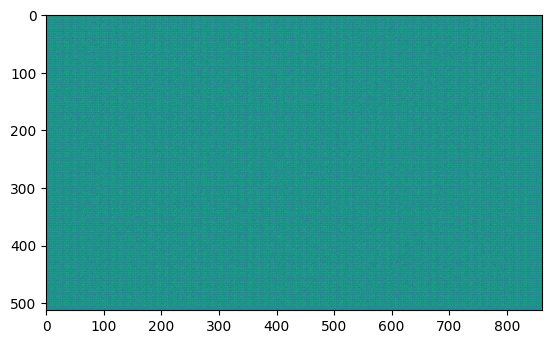

In [2]:
import matplotlib.pyplot as plt
# check if loss parts are equal
def test_loss():
    # Configuration
    batch_size = 4
    channels = 2  # Real + Imag
    height = 513
    width = 862
    num_classes = 17
    latent_size = 30

    # Dummy inputs
    x = torch.randn(batch_size, channels, height, width)
    labels = torch.randint(0, num_classes, (batch_size,))
    print('Max input'   , x.max())
    print('Min input'   , x.min())
    # Initialize model
    model = ConvCVAEPL(latent_size=latent_size, num_classes=num_classes)
    model.eval()

    # Run forward pass
    with torch.no_grad():
        recon_x, mu, logvar = model(x, labels)

    # Loss calculation
    reconstruction_los1 = torch.nn.functional.mse_loss(recon_x[0,0], x[0,0], reduction='mean')
    reconstruction_los2 = torch.nn.functional.mse_loss(recon_x[0,1], x[0,1], reduction='mean')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    plt.imshow(recon_x[0, 0].cpu().numpy())
    print('Max: ', recon_x[0, 0].max())
    print('Min: ', recon_x[0, 0].min())
    
    print("Reconstruction Loss:", reconstruction_los1.item())
    print("Reconstruction Loss:", reconstruction_los2.item())
    print("KL Divergence:", kl_divergence.item())
    
if __name__ == "__main__":
    test_loss()